# Gaussian Process notebook
In this notebook I implement standard gaussian process, this is to help me gain intuition on how GP is related to bayesian approximation using Dropouts.

Some of the code is adapted from COMP0171 Lecture 10

In [3]:
import numpy as np 
import torch 
import torch.distributions as dist
import matplotlib.pyplot as plt 

%matplotlib inline 

In [13]:
# feature space (with bias)
phi = lambda a: torch.stack((a, a.pow(2), torch.ones_like(a)), dim=-1)

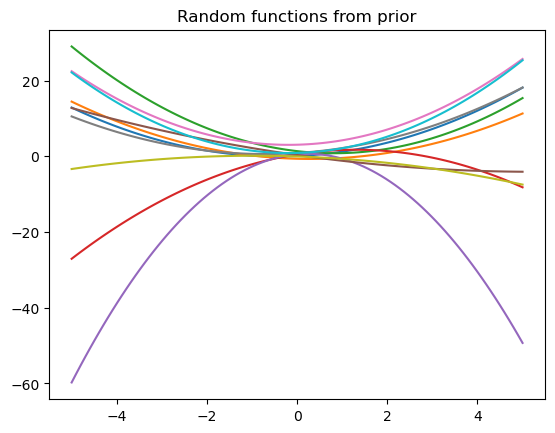

In [18]:
# define domain:
domain = torch.linspace(-5, 5, 100)

# define standard normal prior on weights:
w = dist.Normal(0, 1).sample((3, 10))

f = phi(domain) @ w
plt.title('Random functions from prior')
plt.plot(domain, f);

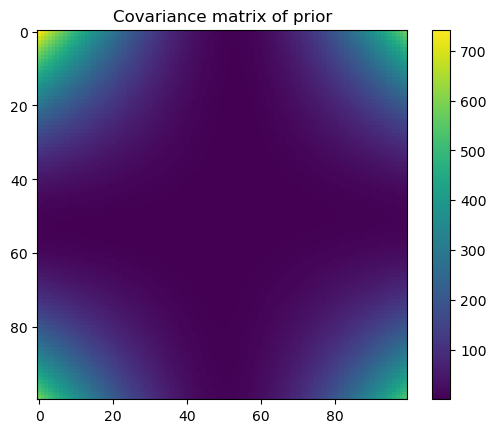

In [19]:
plt.title('Covariance matrix of prior')
plt.imshow(np.cov(f));
plt.colorbar();

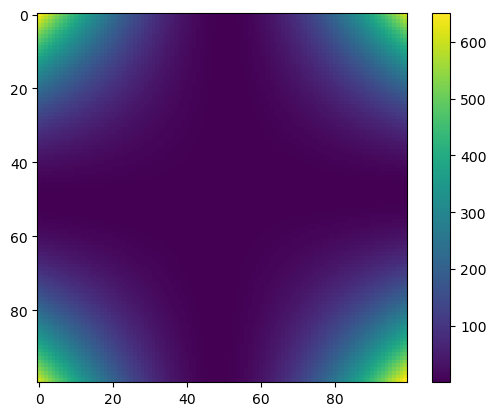

In [36]:
# define kernel:
simple_kernel = lambda x, y: phi(x) @ phi(y).T # note here we can add phi @ cov @ phi^T to create a more complex kernel
plt.imshow(simple_kernel(domain, domain));
plt.colorbar();

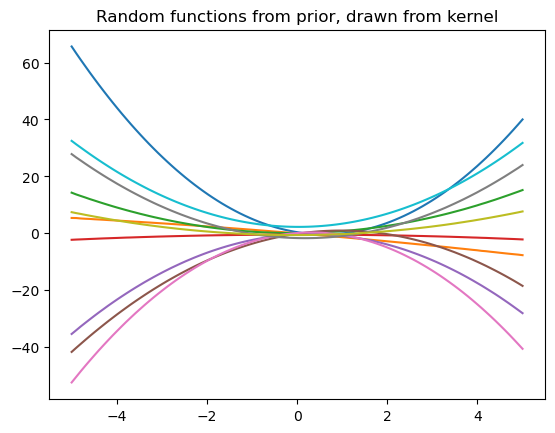

In [38]:
def plot_random_functions(domain, kernel, N_samples=10):
    K = kernel(domain, domain)
    # sample from N(0, K):

    # We want L: LL^T = K
    # We can use cholesky decomposition to get L then f = L @ z where z ~ N(0, I) (but it's unstable)
    # L = torch.linalg.cholesky(K)

    # or we can use eigen decomposition to get L
    d, V = torch.linalg.eigh(K)
    L = d.clamp_min(0.0).sqrt() * V
    f = L @ torch.randn(L.shape[0], N_samples)

    plt.title('Random functions from prior, drawn from kernel')
    plt.plot(domain, f);

# N(0, K)
plot_random_functions(domain, simple_kernel)

In [41]:
def get_exp_kernel(lengthscale):
    return lambda x, y: (
        -0.5 * (x.reshape(-1, 1) - y.reshape(1, -1)).pow(2) / lengthscale**2
    ).exp()

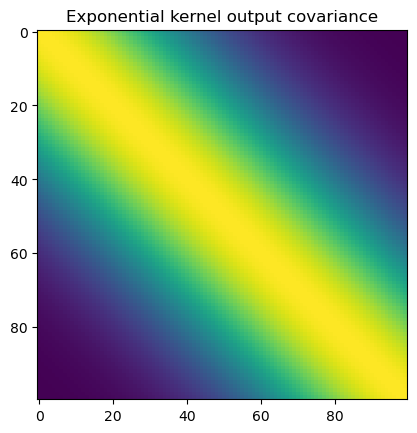

In [47]:
K = get_exp_kernel(3)(domain, domain)
plt.title("Exponential kernel output covariance")
plt.imshow(K);

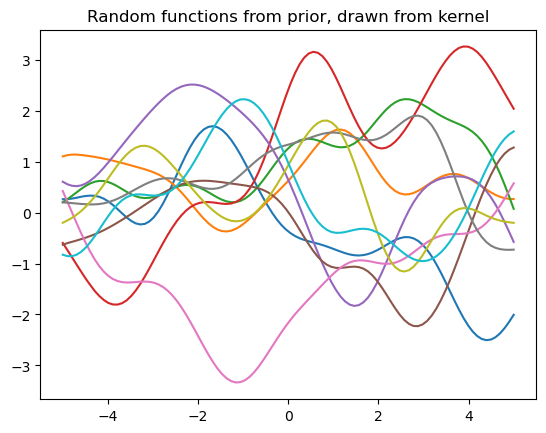

In [55]:
plot_random_functions(domain, get_exp_kernel(1))